In [1]:
from play_by_play import load_specific_games, load_seasons, get_lineup_results, get_lineup_feature
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 81
pd.options.display.max_rows = 150
pd.options.display.max_colwidth = 100

In [2]:
#df, players_dict = load_seasons(seasons=[2016,2017, 2018, 2019], lineups=True, possessions=True, drop_lineup_miscount_games=True)
#print(players_dict.keys())
df_16 = pd.read_csv('PBP_data/NBA_PBP_parsed_2015-16.csv', index_col=0)
df_17 = pd.read_csv('PBP_data/NBA_PBP_parsed_2016-17.csv', index_col=0)
df_18 = pd.read_csv('PBP_data/NBA_PBP_parsed_2017-18.csv', index_col=0)
df_19 = pd.read_csv('PBP_data/NBA_PBP_parsed_2018-19.csv', index_col=0)
df_19 = df_19[~df_19['URL'].isin(list(df_19.loc[(df_19['HomePts'] < 0) | (df_19['AwayPts'] < 0), 'URL'].value_counts().index))].copy()
df_18 = df_18[~df_18['URL'].isin(list(df_18.loc[(df_18['HomePts'] < 0) | (df_18['AwayPts'] < 0), 'URL'].value_counts().index))].copy()
df_17 = df_17[~df_17['URL'].isin(list(df_17.loc[(df_17['HomePts'] < 0) | (df_17['AwayPts'] < 0), 'URL'].value_counts().index))].copy()
df_16 = df_16[~df_16['URL'].isin(list(df_16.loc[(df_16['HomePts'] < 0) | (df_16['AwayPts'] < 0), 'URL'].value_counts().index))].copy()
df = pd.concat([df_16, df_17, df_18, df_19], axis=0)
df.head()


,URL,GameType,Location,Date,Season,WinningTeam,Quarter,SecLeft,Timestamp,SecElapsed,AwayTeam,AwayPlay,AwayPossEnd,AwayPoss,AwayPts,AwayScore,HomeTeam,HomePlay,HomePossEnd,HomePoss,HomePts,HomeScore,Margin,ClosestRemainingMargin,FinalMargin,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,AwayLineup,HomeLineup
0,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,2015-10-27 20:00:00,2015-16,DET,1,720,1,0.0,DET,Jump ball: A. Drummond vs. A. Horford (E. lyasova gains possession),False,0,0,0,ATL,NaN,False,0,0,0,0,0,-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,drumman01,horfoal01,ilyaser01,"jacksre01,caldwke01,morrima03,ilyaser01,drumman01","teaguje01,bazemke01,korveky01,millspa01,horfoal01"
1,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,2015-10-27 20:00:00,2015-16,DET,1,701,2,19.0,DET,A. Drummond misses 2-pt layup from 1 ft (block by A. Horford),False,0,0,0,ATL,NaN,False,0,0,0,0,0,-12,drumman01,2-pt layup,miss,1.0,NaN,horfoal01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"jacksre01,caldwke01,morrima03,ilyaser01,drumman01","teaguje01,bazemke01,korveky01,millspa01,horfoal01"
2,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,2015-10-27 20:00:00,2015-16,DET,1,699,3,2.0,DET,NaN,True,1,0,0,ATL,Defensive rebound by K. Bazemore,False,0,0,0,0,0,-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bazemke01,defensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"jacksre01,caldwke01,morrima03,ilyaser01,drumman01","teaguje01,bazemke01,korveky01,millspa01,horfoal01"
3,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,2015-10-27 20:00:00,2015-16,DET,1,697,4,2.0,DET,NaN,False,1,0,0,ATL,Turnover by K. Bazemore (bad pass),True,1,0,0,0,0,-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bazemke01,bad pass,NaN,NaN,NaN,NaN,NaN,"jacksre01,caldwke01,morrima03,ilyaser01,drumman01","teaguje01,bazemke01,korveky01,millspa01,horfoal01"
4,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,2015-10-27 20:00:00,2015-16,DET,1,681,5,16.0,DET,M. Morris makes 2-pt jump shot from 13 ft (assist by A. Drummond),True,2,2,2,ATL,NaN,False,1,0,0,-2,0,-12,morrima03,2-pt jump shot,make,13.0,drumman01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"jacksre01,caldwke01,morrima03,ilyaser01,drumman01","teaguje01,bazemke01,korveky01,millspa01,horfoal01"


In [3]:
df.value_counts(['URL'])

URL                         
/boxscores/201512180CHI.html    695
/boxscores/201903010ATL.html    677
/boxscores/201510300ORL.html    634
/boxscores/201905030POR.html    624
/boxscores/201902130CLE.html    617
                               ... 
/boxscores/201604050MIL.html    380
/boxscores/201512260ORL.html    379
/boxscores/201603200MIL.html    378
/boxscores/201603260MIL.html    377
/boxscores/201612190CHI.html    363
Length: 3150, dtype: int64

In [4]:
df_lineups, df_matchups = get_lineup_results(df, return_lineup_matchups=False), get_lineup_results(df, return_lineup_matchups=True)
df_matchups.head()

,Season,AwayLineup,HomeLineup,SecElapsed,AwayPossEnd,HomePossEnd,AwayPts,HomePts,HomePPP,AwayPPP,TotalPossessions,SecElapsedCumDist,TotPossCumDist
0,2018-19,"augusdj01,fournev01,gordoaa01,vucevni01,isaacjo01","lowryky01,greenda02,leonaka01,siakapa01,gasolma01",3178.0,109,112,94,154,1.375000,0.862385,221,0.000348,0.000355
1,2015-16,"westbru01,roberan03,ibakase01,duranke01,adamsst01","parketo01,greenda02,leonaka01,duncati01,aldrila01",2851.0,93,90,90,96,1.066667,0.967742,183,0.000660,0.000649
2,2018-19,"redicjj01,butleji01,harrito02,simmobe01,embiijo01","lowryky01,greenda02,leonaka01,siakapa01,gasolma01",2792.0,90,91,86,91,1.000000,0.955556,181,0.000966,0.000940
3,2018-19,"lillada01,mccolcj01,harklma01,aminual01,kanteen01","murraja01,harriga01,craigto01,millspa01,jokicni01",2698.0,89,91,92,117,1.285714,1.033708,180,0.001261,0.001229
4,2015-16,"westbru01,roberan03,ibakase01,duranke01,adamsst01","curryst01,thompkl01,greendr01,barneha02,bogutan01",2471.0,84,82,89,76,0.926829,1.059524,166,0.001532,0.001496


In [5]:
df_lineups.head()

,Season,Lineup,SecElapsed,Home,OffPoss,DefPoss,PtsScored,PtsAllowed,OffPPP,DefPPP,TotalPossessions,SecElapsedCumDist,TotPossCumDist
0,2015-16,"teaguje01,bazemke01,korveky01,millspa01,horfoal01",32029.0,False,1088,1085,1154,1137,1.060662,1.047926,2173,0.001753,0.001746
1,2018-19,"westbru01,fergute01,grantje01,georgpa01,adamsst01",30631.0,True,1088,1080,1288,1147,1.183824,1.062037,2168,0.003430,0.003487
2,2015-16,"westbru01,roberan03,ibakase01,duranke01,adamsst01",33182.0,True,1079,1082,1276,1052,1.182576,0.972274,2161,0.005246,0.005223
3,2015-16,"westbru01,roberan03,ibakase01,duranke01,adamsst01",32342.0,False,1046,1050,1185,1092,1.132887,1.040000,2096,0.007016,0.006907
4,2018-19,"westbru01,fergute01,grantje01,georgpa01,adamsst01",28786.0,False,1036,1013,1124,1088,1.084942,1.074038,2049,0.008592,0.008553


In [ ]:
#df_matchups = pd.read_csv('PBP_data/NBA_PBP_parsed_matchups.csv', index_col=0)
#df_lineups = pd.read_csv('PBP_data/NBA_PBP_lineups.csv', index_col=0)

In [ ]:
#big_df = pd.read_csv('PBP_data/big_df_sample_features.csv', index_col=0)
#big_df.columns


In [ ]:
sample_table_cols = [('info',('Height_cm', 'Mass_kg', 'age', 'salary')),
              ('advanced',('USG%','WS/48','OBPM','DBPM','BPM','VORP')),
              ('per_poss',('3PA', '3P%', '2PA', '2P%', 'FT', 'FTA','FT%', 'ORB', 
                           'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
                           'ORtg', 'DRtg')),
             ]

In [6]:
table_cols = [('info',('Height_cm', 'Mass_kg', 'age', 'salary')),
              ('advanced',('USG%','OBPM','DBPM','VORP')),
              ('per_poss',('ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
                           'ORtg', 'DRtg')),
             ]

big_lineup_df = df_lineups.iloc[:,:]
big_matchup_df = df_matchups.iloc[:,:]
for t, cols in table_cols:
    for col in cols:
        print(t, col)
        
        big_lineup_df = get_lineup_feature(big_lineup_df, table_name=t,
                                   col_name=col,
                                   seasons_ago=0,
                                   agg='mean',
                                   delta_AwayHome=False)
        if col in ['Height_cm']:
            big_lineup_df = get_lineup_feature(big_lineup_df, table_name=t,
                                   col_name=col,
                                   seasons_ago=0,
                                   agg='list',
                                   delta_AwayHome=False)
            big_matchup_df = get_lineup_feature(big_matchup_df, table_name=t,
                                   col_name=col,
                                   seasons_ago=0,
                                   agg='list',
                                   delta_AwayHome=True)
        big_matchup_df = get_lineup_feature(big_matchup_df, table_name=t,
                                   col_name=col,
                                   seasons_ago=0,
                                   agg='mean',
                                   delta_AwayHome=True)

        

info Height_cm
Loading murraja01... Loading davisan02... Loading harremo01... Loading carteje01... Loading adamsst01... Loading landrca01... Loading gibsojo01... Loading mooreet01... Loading baglema01... Loading gasolma01... Loading anderja01... Loading kornelu01... Loading yabusgu01... Loading mcderdo01... Loading kingge03... Loading livinsh01... Loading mitrona01... Loading iwundwe01... Loading poeltja01... Loading drumman01... Loading kuzmaky01... Loading stuckro01... Loading ndourma01... Loading jacksde01... Loading dragigo01... Loading brookdi01... Loading cottobr01... Loading kuzmimi01... Loading korkmfu01... Loading doziepj01... Loading willide01... Loading brownlo01... Loading rubiori01... Loading olynyke01... Loading simmobe01... Loading howardw01... Loading alkinra01... Loading moreler01... Loading jeffeam01... Loading bonnema01... Loading lawsoty01... Loading millean02... Loading chiozch01... Loading dellama01... Loading bayleje01... Loading pattepa01... Loading anderky01...

In [10]:
big_matchup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87406 entries, 0 to 87405
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             87406 non-null  object 
 1   AwayLineup         87406 non-null  object 
 2   HomeLineup         87406 non-null  object 
 3   SecElapsed         87406 non-null  float64
 4   AwayPossEnd        87406 non-null  int64  
 5   HomePossEnd        87406 non-null  int64  
 6   AwayPts            87406 non-null  int64  
 7   HomePts            87406 non-null  int64  
 8   HomePPP            82174 non-null  float64
 9   AwayPPP            82237 non-null  float64
 10  TotalPossessions   87406 non-null  int64  
 11  SecElapsedCumDist  87406 non-null  float64
 12  TotPossCumDist     87406 non-null  float64
 13  delta1_cm          87406 non-null  int64  
 14  delta2_cm          87406 non-null  int64  
 15  delta3_cm          87406 non-null  int64  
 16  delta4_cm          874

In [11]:
big_lineup_df.head()

,Season,Lineup,SecElapsed,Home,OffPoss,DefPoss,PtsScored,PtsAllowed,OffPPP,DefPPP,TotalPossessions,SecElapsedCumDist,TotPossCumDist,LineupMean_cm,Lineup1_cm,Lineup2_cm,Lineup3_cm,Lineup4_cm,Lineup5_cm,LineupMean_kg,LineupMean_age,LineupMean_salary,LineupMean_USG%,LineupMean_OBPM,LineupMean_DBPM,LineupMean_VORP,LineupMean_ORB,LineupMean_DRB,LineupMean_AST,LineupMean_STL,LineupMean_BLK,LineupMean_TOV,LineupMean_PF,LineupMean_PTS,LineupMean_ORtg,LineupMean_DRtg
0,2015-16,"teaguje01,bazemke01,korveky01,millspa01,horfoal01",32029.0,False,1088,1085,1154,1137,1.060662,1.047926,2173,0.001753,0.001746,198.2,190,193,201,201,206,99.2,32.864,20561873.2,19.66,0.42,0.32,1.26,1.76,6.52,6.16,1.72,1.16,2.84,3.96,21.68,111.4,110.4
1,2018-19,"westbru01,fergute01,grantje01,georgpa01,adamsst01",30631.0,True,1088,1080,1288,1147,1.183824,1.062037,2168,0.003430,0.003487,201.0,190,198,203,203,211,98.0,25.940,20228968.2,20.56,0.96,1.02,2.80,2.58,7.16,4.88,1.88,0.94,2.78,4.16,23.30,114.4,106.8
2,2015-16,"westbru01,roberan03,ibakase01,duranke01,adamsst01",33182.0,True,1079,1082,1276,1052,1.182576,0.972274,2161,0.005246,0.005223,203.6,190,201,208,208,211,103.8,28.444,24295624.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-16,"westbru01,roberan03,ibakase01,duranke01,adamsst01",32342.0,False,1046,1050,1185,1092,1.132887,1.040000,2096,0.007016,0.006907,203.6,190,201,208,208,211,103.8,28.444,24295624.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-19,"westbru01,fergute01,grantje01,georgpa01,adamsst01",28786.0,False,1036,1013,1124,1088,1.084942,1.074038,2049,0.008592,0.008553,201.0,190,198,203,203,211,98.0,25.940,20228968.2,20.56,0.96,1.02,2.80,2.58,7.16,4.88,1.88,0.94,2.78,4.16,23.30,114.4,106.8


In [ ]:
get_substr_cols = lambda df_specific, x:[col for col in df_specific.columns if x in col]


big_df.head()

In [14]:
new_df = big_lineup_df[['Season', 'Lineup', 'Home', 'TotalPossessions']+[col for col in big_lineup_df.columns if 'cm' in col]].melt(id_vars=['Season', 'Lineup', 'Home','TotalPossessions']).copy()
#new_df['rel_weight'] = new_df['TotalPossessions'] / new_df['TotalPossessions'].sum()

In [23]:
sns.boxenplot(data=new_df, 
            x='variable', 
            y='value',
            hue='Season',
            weights='TotalPossessions')
plt.show()

TypeError: boxenplot() got an unexpected keyword argument 'weights'

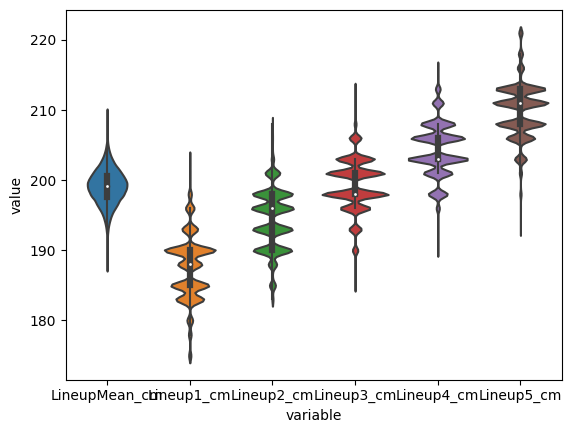

In [20]:
sns.violinplot(data=new_df, 
            x='variable', 
            y='value')
plt.show()

In [ ]:
big_df.to_csv('PBP_data/big_df_sample_features.csv', header=True, index=True)




In [ ]:
new_df